# Tracking Data Visualizations
The purpose of the following notebook is to build visualizations for certain plays to see how the tracking data interacts with each other.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl

# for creating animations
import matplotlib.animation
from IPython.display import HTML
pd.set_option('display.max_columns', None)

In [2]:
# Read in data
#Read in all our data sets and one week's worth of data
games = pd.read_csv("../Data/games.csv")
players = pd.read_csv("../Data/players.csv")
plays = pd.read_csv("../Data/plays.csv")
tackles = pd.read_csv("../Data/tackles.csv")
tracking = pd.read_csv("../Data/tracking_week_1.csv")

In [16]:
#Select eagles lions game from week 1
game_id_eagles_lions = games[(games["visitorTeamAbbr"]== "PHI") & (games["week"]==1)]["gameId"].values[0]
print(game_id_eagles_lions)

2022091104


In [62]:
#filter plays data set to include only this game
plays_eagles_lions = plays[plays["gameId"] == game_id_eagles_lions]
#Select first play to analyze
longest_play = plays_eagles_lions.sort_values(by='prePenaltyPlayResult', ascending=False)["playId"].values[1]
playId_analyze = plays_eagles_lions[plays_eagles_lions["playId"]==longest_play]
display(playId_analyze)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
243,2022091104,86,52443,D'Andre Swift,(14:27) D.Swift left tackle to PHI 26 for 50 y...,1,2,11,DET,PHI,DET,24,14:27,0,0,NaN,NaN,NaN,50,50,N,86,SINGLEBACK,6.0,0.755472,0.324017,0.675983,0.097055,-0.097055,0.252368,4.246837,NaN,NaN,NaN,NaN


In [63]:
#obtain only the tracking data for this play
tracking_play = tracking[(tracking["gameId"] == game_id_eagles_lions) & (tracking["playId"]==longest_play)]
display(tracking_play)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
463910,2022091104,86,38542.0,Fletcher Cox,1,2022-09-11 13:05:33.200000,91.0,PHI,left,85.530000,25.16,0.00,0.00,0.00,97.14,359.65,NaN
463911,2022091104,86,38542.0,Fletcher Cox,2,2022-09-11 13:05:33.299999,91.0,PHI,left,85.530000,25.16,0.00,0.00,0.00,97.14,1.85,NaN
463912,2022091104,86,38542.0,Fletcher Cox,3,2022-09-11 13:05:33.400000,91.0,PHI,left,85.530000,25.15,0.00,0.00,0.00,97.14,4.75,NaN
463913,2022091104,86,38542.0,Fletcher Cox,4,2022-09-11 13:05:33.500000,91.0,PHI,left,85.540000,25.15,0.01,0.11,0.00,95.52,118.74,NaN
463914,2022091104,86,38542.0,Fletcher Cox,5,2022-09-11 13:05:33.599999,91.0,PHI,left,85.540000,25.15,0.04,0.34,0.01,93.85,94.85,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466067,2022091104,86,NaN,football,90,2022-09-11 13:05:42.099999,NaN,football,left,37.049999,1.82,7.44,3.76,0.76,NaN,NaN,tackle
466068,2022091104,86,NaN,football,91,2022-09-11 13:05:42.200000,NaN,football,left,36.400002,1.71,6.80,4.52,0.66,NaN,NaN,NaN
466069,2022091104,86,NaN,football,92,2022-09-11 13:05:42.299999,NaN,football,left,35.790001,1.59,6.15,5.57,0.63,NaN,NaN,NaN
466070,2022091104,86,NaN,football,93,2022-09-11 13:05:42.400000,NaN,football,left,35.209999,1.47,5.56,6.49,0.59,NaN,NaN,NaN


In [66]:
#select only the first frame to analyze
tracking_play_first = tracking_play[tracking_play["frameId"]==1]
display(tracking_play_first)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
463910,2022091104,86,38542.0,Fletcher Cox,1,2022-09-11 13:05:33.200000,91.0,PHI,left,85.530000,25.160000,0.00,0.00,0.00,97.14,359.65,NaN
464004,2022091104,86,39984.0,Darius Slay,1,2022-09-11 13:05:33.200000,2.0,PHI,left,78.390000,37.220000,0.78,0.96,0.08,116.93,289.38,NaN
464098,2022091104,86,43290.0,Jared Goff,1,2022-09-11 13:05:33.200000,16.0,DET,left,87.640000,23.670000,0.00,0.00,0.00,262.05,23.26,NaN
464192,2022091104,86,43305.0,Taylor Decker,1,2022-09-11 13:05:33.200000,68.0,DET,left,87.170000,20.340000,0.00,0.00,0.00,268.77,281.34,NaN
464286,2022091104,86,43351.0,James Bradberry,1,2022-09-11 13:05:33.200000,24.0,PHI,left,78.720000,14.250000,0.05,0.03,0.00,60.70,344.72,NaN
464380,2022091104,86,43378.0,Javon Hargrave,1,2022-09-11 13:05:33.200000,97.0,PHI,left,85.390000,21.470000,0.02,0.04,0.00,83.26,4.27,NaN
464474,2022091104,86,44825.0,Haason Reddick,1,2022-09-11 13:05:33.200000,7.0,PHI,left,85.520000,29.150000,0.00,0.00,0.00,139.62,55.97,NaN
464568,2022091104,86,44930.0,Josh Reynolds,1,2022-09-11 13:05:33.200000,8.0,DET,left,87.740000,35.290000,0.30,1.21,0.03,280.16,353.42,NaN
464662,2022091104,86,46089.0,Frank Ragnow,1,2022-09-11 13:05:33.200000,77.0,DET,left,86.690000,23.740000,0.00,0.00,0.00,253.17,280.69,NaN
464756,2022091104,86,46130.0,D.J. Chark,1,2022-09-11 13:05:33.200000,4.0,DET,left,86.780000,34.590000,0.00,0.00,0.00,266.64,250.48,NaN


(<Figure size 1200x633 with 1 Axes>, <AxesSubplot:>)

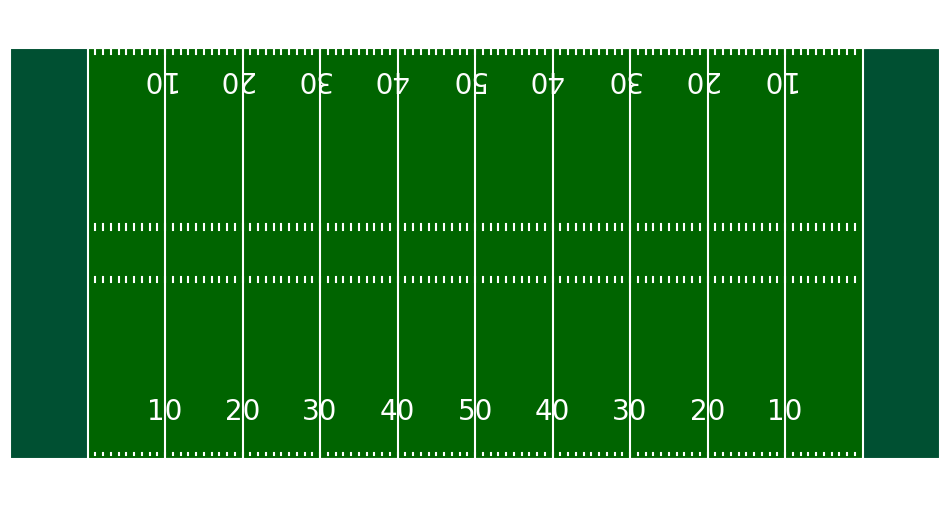

In [48]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

create_football_field()

In [1]:
create_football_field()
plt.scatter(tracking_play_first[tracking_play_first["club"]=="DET"]["x"],tracking_play_first[tracking_play_first["club"]=="DET"]["y"], marker = "o", color = "white", facecolors = "None")
plt.scatter(tracking_play_first[tracking_play_first["club"]=="football"]["x"],tracking_play_first[tracking_play_first["club"]=="football"]["y"], color = "brown", marker = "o")
plt.scatter(tracking_play_first[tracking_play_first["club"]=="PHI"]["x"],tracking_play_first[tracking_play_first["club"]=="PHI"]["y"], marker = "x",color = "white")

NameError: name 'create_football_field' is not defined

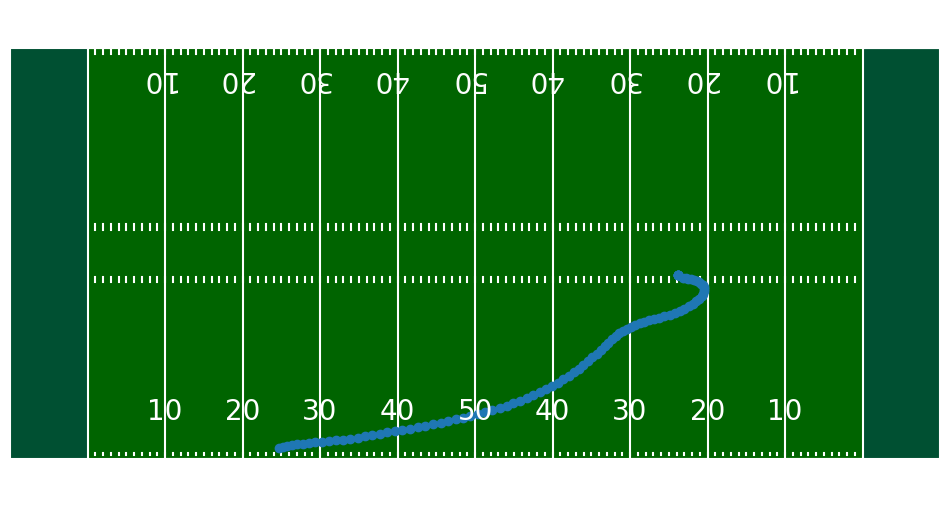

In [64]:
#tracking football
create_football_field()
plt.plot(tracking_play[tracking_play["club"]=="football"]["x"],tracking_play[tracking_play["club"]=="football"]["y"], "o")

In [55]:
display(tracking_play)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
511865,2022091104,2228,37266.0,Jason Kelce,1,2022-09-11 14:34:45.900000,62.0,PHI,left,72.29,25.090000,1.49,0.41,0.16,263.63,269.14,NaN
511866,2022091104,2228,37266.0,Jason Kelce,2,2022-09-11 14:34:46.000000,62.0,PHI,left,72.13,25.080000,1.52,0.41,0.16,263.63,267.49,pass_arrived
511867,2022091104,2228,37266.0,Jason Kelce,3,2022-09-11 14:34:46.099999,62.0,PHI,left,71.97,25.070000,1.54,0.36,0.16,263.63,266.86,NaN
511868,2022091104,2228,37266.0,Jason Kelce,4,2022-09-11 14:34:46.200000,62.0,PHI,left,71.81,25.050000,1.52,0.46,0.16,263.63,263.94,NaN
511869,2022091104,2228,37266.0,Jason Kelce,5,2022-09-11 14:34:46.299999,62.0,PHI,left,71.64,25.020000,1.62,0.46,0.18,260.92,260.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512872,2022091104,2228,NaN,football,40,2022-09-11 14:34:49.799999,NaN,football,left,14.56,48.450001,1.46,3.54,0.16,NaN,NaN,tackle
512873,2022091104,2228,NaN,football,41,2022-09-11 14:34:49.900000,NaN,football,left,14.46,48.500000,1.02,3.52,0.12,NaN,NaN,NaN
512874,2022091104,2228,NaN,football,42,2022-09-11 14:34:50.000000,NaN,football,left,14.39,48.540001,0.67,3.39,0.08,NaN,NaN,NaN
512875,2022091104,2228,NaN,football,43,2022-09-11 14:34:50.099999,NaN,football,left,14.36,48.570000,0.32,3.22,0.04,NaN,NaN,NaN


In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def create_football_field(linenumbers=True,
                          endzones=True,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for plotting player movements
    """
    rect = plt.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                         edgecolor='r', facecolor='green', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.xlim(0, 120)
    plt.ylim(0, 53.3)
    plt.axis('off')

    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # Adjust size if necessary
                     color='white',
                     zorder=20)

    if endzones:
        ez1 = plt.Rectangle((0, 0), 10, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
        ez2 = plt.Rectangle((110, 0), 120, 53.3,
                            linewidth=0.1,
                            edgecolor='r',
                            facecolor='blue',
                            alpha=0.2,
                            zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)

    return fig, ax


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# The create_football_field function goes here
# ...

def animate_player_movement(tracking_data, game_id, play_id):
    """
    Animates the player movement for the given game and play ID within a Jupyter notebook.
    """
    
    # Filter the tracking data for the given game and play
    play_data = tracking_data[(tracking_data.gameId == game_id) & (tracking_data.playId == play_id)]
    
    # Sort the data by frameId
    play_data = play_data.sort_values(by='frameId')

    # Create the football field
    fig, ax = create_football_field()
    
    # Set the title
    plt.title(f'Game ID: {game_id} - Play ID: {play_id}')

    # Plot the initial positions of the players and football, using a single default color
    scat = ax.scatter(play_data.x.iloc[0], play_data.y.iloc[0], s=40, color='blue')

    def update(frame_number):
        # Update player and ball positions for the given frame
        frame_data = play_data[play_data.frameId == frame_number]
        
        # Assign colors for this frame: 'brown' for football, 'blue' for all others
        colors = ['brown' if name == 'football' else 'blue' for name in frame_data.displayName]
        
        # Set the scatter plot positions and colors
        scat.set_offsets(frame_data[['x', 'y']].values)
        scat.set_color(colors)

        return scat,

    # Create the animation
    anim = FuncAnimation(fig, update, frames=range(1, play_data.frameId.max() + 1), interval=100, blit=True)

    # Use HTML to create a video within the notebook
    return HTML(anim.to_html5_video())


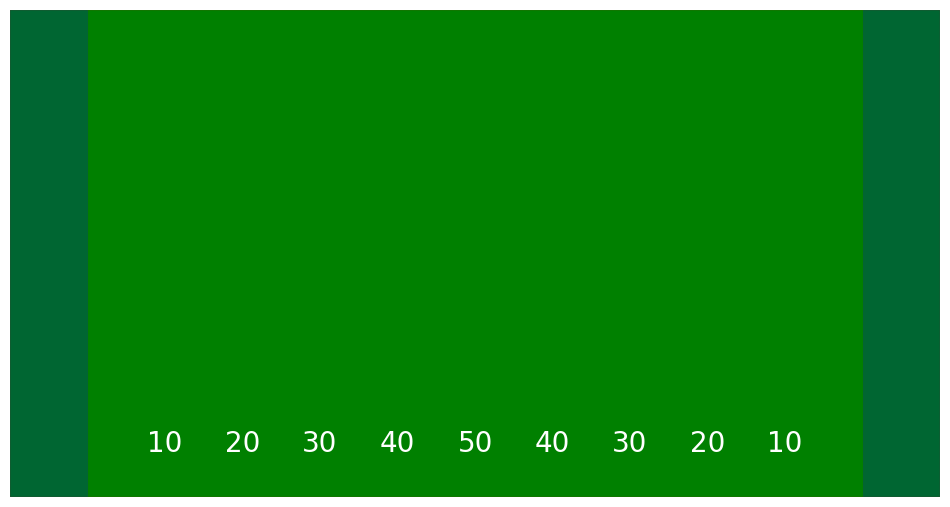

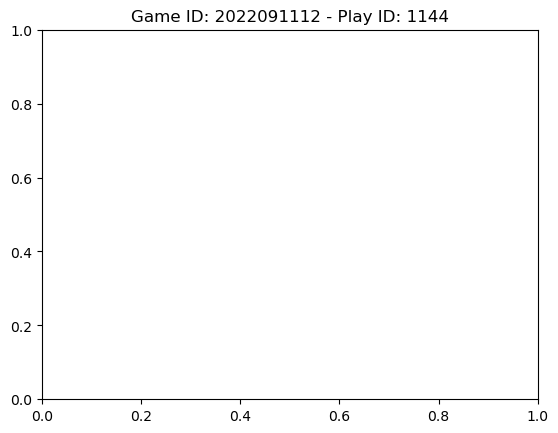

In [47]:
# Example usage:
game_id_example = 2022091112  # Replace with actual game ID
play_id_example = 1144  # Replace with actual play ID
animate_player_movement(tracking, game_id_example, play_id_example)

# What happens on plays when y is negaive or over 53.3

In [29]:
# Now, filter out the plays where 'y' is negative and 'displayName' is 'football'
negative_y_football_plays = tracking[((tracking['y'] < 0) | (tracking['y'] > 53.3)) & (tracking['displayName'] == 'football')]

# Since you want the unique plays where this occurs, you can use drop_duplicates
unique_negative_y_plays = negative_y_football_plays.drop_duplicates(subset=['gameId', 'playId'])

print(unique_negative_y_plays)

             gameId  playId  nflId displayName  frameId  \
9333     2022090800     364    NaN    football        8   
12164    2022090800     438    NaN    football       26   
15566    2022090800     617    NaN    football       16   
19108    2022090800     867    NaN    football       24   
27064    2022090800    1286    NaN    football       25   
...             ...     ...    ...         ...      ...   
1391108  2022091200    3048    NaN    football       27   
1397381  2022091200    3216    NaN    football       26   
1397889  2022091200    3267    NaN    football       18   
1398579  2022091200    3296    NaN    football       26   
1399984  2022091200    3491    NaN    football       34   

                               time  jerseyNumber      club playDirection  \
9333     2022-09-08 20:35:18.099999           NaN  football         right   
12164    2022-09-08 20:37:02.700000           NaN  football         right   
15566    2022-09-08 20:44:16.200000           NaN  football 

In [30]:
#What are the play descriptions
unique_negative_y_plays['event'].value_counts()


out_of_bounds          41
pass_outcome_caught     4
first_contact           4
tackle                  3
pass_arrived            1
touchdown               1
Name: event, dtype: int64

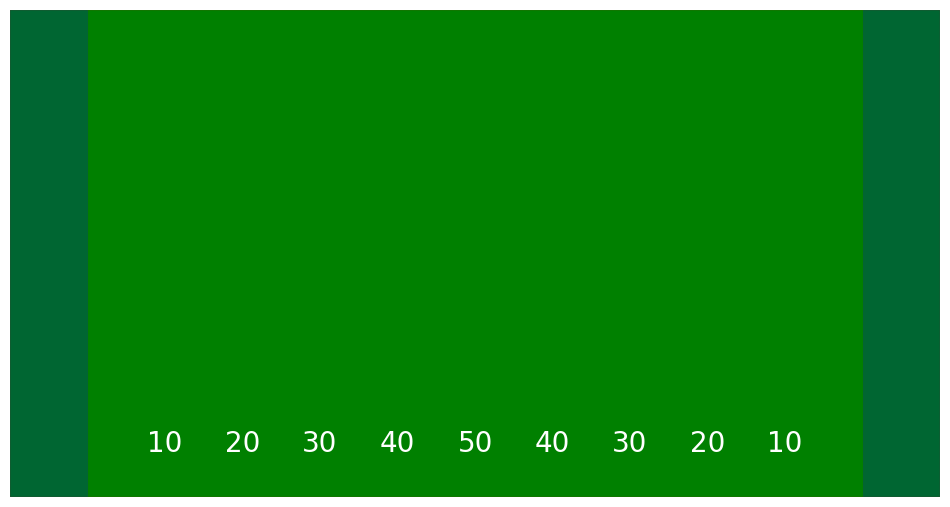

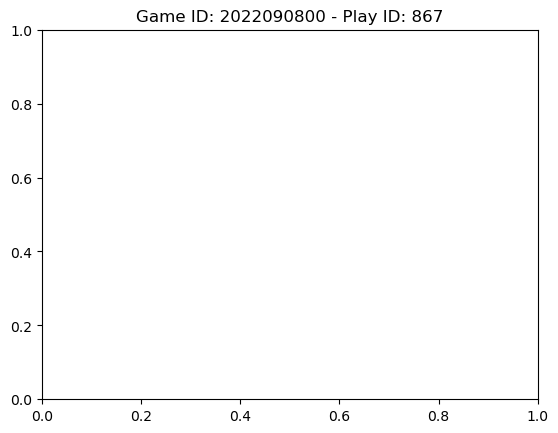

In [40]:
i = 3
game_id_example = unique_negative_y_plays.iloc[i]["gameId"] # Replace with actual game ID
play_id_example =  unique_negative_y_plays.iloc[i]["playId"]# Replace with actual play ID
animate_player_movement(tracking, game_id_example, play_id_example)

In [41]:
display(tracking[(tracking["gameId"]==game_id_example)& (tracking["playId"]==play_id_example)& (tracking["displayName"]=="football")])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
19085,2022090800,867,NaN,football,1,2022-09-08 20:55:06.900000,NaN,football,right,38.930000,11.48,13.58,3.53,1.38,NaN,NaN,NaN
19086,2022090800,867,NaN,football,2,2022-09-08 20:55:07.000000,NaN,football,right,39.580002,10.36,13.19,3.86,1.30,NaN,NaN,NaN
19087,2022090800,867,NaN,football,3,2022-09-08 20:55:07.099999,NaN,football,right,39.820000,8.81,5.48,0.10,1.56,NaN,NaN,pass_arrived
19088,2022090800,867,NaN,football,4,2022-09-08 20:55:07.200000,NaN,football,right,40.029999,8.31,5.54,0.68,0.54,NaN,NaN,NaN
19089,2022090800,867,NaN,football,5,2022-09-08 20:55:07.299999,NaN,football,right,40.240002,7.80,5.55,0.17,0.55,NaN,NaN,NaN
19090,2022090800,867,NaN,football,6,2022-09-08 20:55:07.400000,NaN,football,right,40.450001,7.29,5.53,0.33,0.55,NaN,NaN,pass_outcome_caught
19091,2022090800,867,NaN,football,7,2022-09-08 20:55:07.500000,NaN,football,right,40.639999,6.78,5.44,0.82,0.55,NaN,NaN,NaN
19092,2022090800,867,NaN,football,8,2022-09-08 20:55:07.599999,NaN,football,right,40.840000,6.28,5.35,1.19,0.54,NaN,NaN,NaN
19093,2022090800,867,NaN,football,9,2022-09-08 20:55:07.700000,NaN,football,right,41.049999,5.78,5.32,1.18,0.54,NaN,NaN,NaN
19094,2022090800,867,NaN,football,10,2022-09-08 20:55:07.799999,NaN,football,right,41.250000,5.29,5.20,1.38,0.53,NaN,NaN,NaN


In [43]:
display(tracking[tracking["event"]=="ball_snap"])

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
1201,2022090800,101,35472.0,Rodger Saffold,6,2022-09-08 20:25:08.700000,76.0,BUF,left,73.130000,27.67,0.10,1.14,0.02,273.97,348.75,ball_snap
1250,2022090800,101,38577.0,Bobby Wagner,6,2022-09-08 20:25:08.700000,45.0,LA,left,67.350000,29.96,0.07,0.06,0.04,70.42,26.33,ball_snap
1299,2022090800,101,41239.0,Aaron Donald,6,2022-09-08 20:25:08.700000,99.0,LA,left,71.300000,26.43,0.02,0.03,0.01,64.49,95.37,ball_snap
1348,2022090800,101,42392.0,Mitch Morse,6,2022-09-08 20:25:08.700000,60.0,BUF,left,72.500000,29.47,0.00,0.08,0.00,273.23,224.11,ball_snap
1397,2022090800,101,42816.0,Troy Hill,6,2022-09-08 20:25:08.700000,2.0,LA,left,64.660000,40.90,0.43,0.23,0.04,100.21,0.54,ball_snap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403934,2022091200,3685,52491.0,Lloyd Cushenberry,6,2022-09-12 22:58:56.299999,79.0,DEN,left,72.380000,29.81,0.34,0.90,0.03,254.86,333.65,ball_snap
1403992,2022091200,3685,52526.0,Albert Okwuegbunam,6,2022-09-12 22:58:56.299999,85.0,DEN,left,73.940000,34.59,0.14,0.55,0.01,239.29,306.98,ball_snap
1404050,2022091200,3685,54505.0,Boye Mafe,6,2022-09-12 22:58:56.299999,53.0,SEA,left,71.040000,24.04,0.06,0.17,0.00,41.10,315.22,ball_snap
1404108,2022091200,3685,54618.0,Tariq Woolen,6,2022-09-12 22:58:56.299999,27.0,SEA,left,65.230000,14.70,0.08,0.42,0.01,74.56,316.43,ball_snap
